In [15]:
import os
import pyodbc
import pandas as pd

# Establish connection to Azure SQL Database
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=house-server.database.windows.net;'
    'DATABASE=house_db;'
    f"UID=sekanti02;"
    f"PWD=fatih_24584040"
)

# Fetch data from the houses2 table
query = "SELECT * FROM houses"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the first few rows of the dataframe
df.head()


C:\Users\sekan\AppData\Local\Temp\ipykernel_18852\2139832945.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,id,url,title,price,apartment_no,street,city,state,zip_code,location_tag,...,is_available_now,has_cats_ok,has_dogs_ok,has_wd_in_unit,is_furnished,has_attached_garage,no_smoking,is_wheelchair_accessible,has_air_conditioning,has_ev_charging
0,1,https://losangeles.craigslist.org/wst/apa/d/lo...,1 Bedroom 1 Bath Near Culver City | Quartz Cou...,2250.0,4111,Mclaughlin Avenue,Los Angeles,CA,90066,Near Culver City,...,True,True,False,False,False,False,False,False,False,False
1,2,https://losangeles.craigslist.org/sfv/apa/d/gl...,"PRIME GLENDALE LOCATION, HOUSE, CENTRAL AC, WD...",5795.0,None,None,None,None,None,GLENDALE,...,False,True,True,False,False,False,False,False,False,False
2,3,https://losangeles.craigslist.org/wst/apa/d/lo...,Tranquility Inside. City Outside.,4406.0,550,South Barrington Avenue,Los Angeles,CA,90049,Los Angele,...,True,True,True,False,False,False,False,False,False,False
3,4,https://losangeles.craigslist.org/lac/apa/d/lo...,Make Your New Start Here! Kingsley Dr,1325.0,560,N. Kingsley Dr.,Los Angeles,CA,90004,Los Angele,...,True,False,False,False,False,False,False,False,False,False
4,5,https://losangeles.craigslist.org/lac/apa/d/lo...,Summer Special - Junes Rent Free On Approved C...,1450.0,4147,S Bronson,Los Angeles,CA,90008,Los Angele,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2704 non-null   int64         
 1   url                       2704 non-null   object        
 2   title                     2704 non-null   object        
 3   price                     2704 non-null   float64       
 4   apartment_no              2322 non-null   object        
 5   street                    2322 non-null   object        
 6   city                      2322 non-null   object        
 7   state                     2322 non-null   object        
 8   zip_code                  2322 non-null   object        
 9   location_tag              2704 non-null   object        
 10  google_maps_url           2262 non-null   object        
 11  latitude                  2262 non-null   float64       
 12  longitude           

In [26]:
df.columns

Index(['id', 'url', 'title', 'price', 'apartment_no', 'street', 'city',
       'state', 'zip_code', 'location_tag', 'google_maps_url', 'latitude',
       'longitude', 'br_ba', 'bed_rooms', 'bath_rooms', 'ft', 'available_till',
       'cover_img', 'posting_id', 'posting_date', 'is_available_now',
       'has_cats_ok', 'has_dogs_ok', 'has_wd_in_unit', 'is_furnished',
       'has_attached_garage', 'no_smoking', 'is_wheelchair_accessible',
       'has_air_conditioning', 'has_ev_charging'],
      dtype='object')

In [27]:
df.to_csv('houses.csv', index=False)

# Data exploration

In [30]:
df2 = pd.read_csv('houses.csv')


In [41]:
df2["total_rooms"] = df2["bed_rooms"] + df2["bath_rooms"]
df2["price/sqft"] = df2["price"] / df2["ft"]
df2.to_csv('houses.csv', index=False)

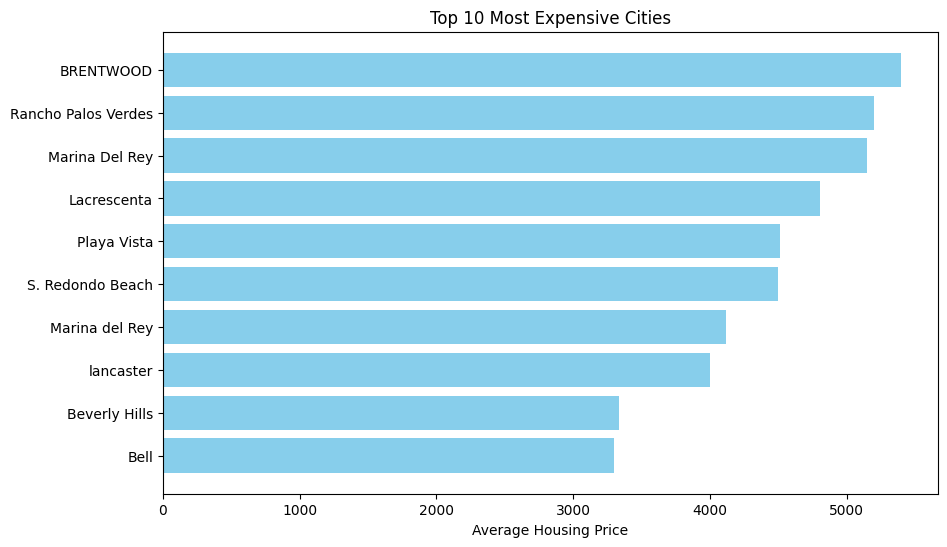

In [34]:
from matplotlib import pyplot as plt
# Group by city and calculate the average housing price
city_avg_price = df2.groupby('city')['price'].mean().reset_index()

# Sort cities by average price in descending order
top_10_expensive = city_avg_price.sort_values(by='price', ascending=False).head(10)

# Create a bar chart to visualize the top 10 most expensive cities
plt.figure(figsize=(10, 6))
plt.barh(top_10_expensive['city'], top_10_expensive['price'], color='skyblue')
plt.xlabel('Average Housing Price')
plt.title('Top 10 Most Expensive Cities')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest price at the top
plt.show()

In [40]:
df.describe()

,id,price,latitude,longitude,bed_rooms,bath_rooms,ft,posting_date
count,2704.000000,2704.000000,2262.000000,2262.000000,2704.000000,2704.000000,2146.000000,2704
mean,2202.879438,2549.686021,34.111874,-118.362621,1.297337,1.330251,1107.299627,2024-05-21 22:31:35.054733824
min,1.000000,376.000000,33.714827,-118.792324,0.000000,1.000000,120.000000,2024-04-29 09:01:59
25%,775.750000,1900.000000,34.044651,-118.453713,1.000000,1.000000,600.000000,2024-05-15 23:20:48.750000128
50%,2338.000000,2395.000000,34.090751,-118.383457,1.000000,1.000000,750.000000,2024-05-26 04:17:43.500000
75%,3628.250000,2895.000000,34.175045,-118.290398,2.000000,2.000000,950.000000,2024-05-29 08:11:46.249999872
max,4344.000000,32796.000000,34.719867,-117.748665,6.000000,5.000000,664706.000000,2024-05-29 12:40:07
std,1449.289512,1196.215127,0.136220,0.154581,0.903592,0.544738,14335.225948,NaN


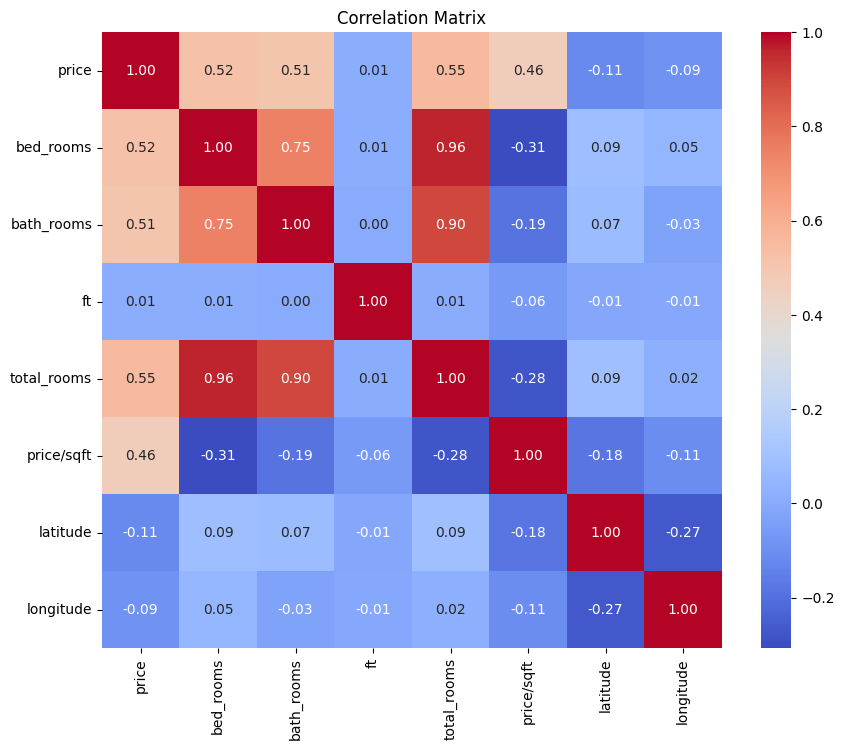

In [38]:
import seaborn as sns

df2_num = df2[["price", "bed_rooms", "bath_rooms", "ft", "total_rooms", "price/sqft", "latitude", "longitude"]]
# Compute the correlation matrix
corr_matrix = df2_num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

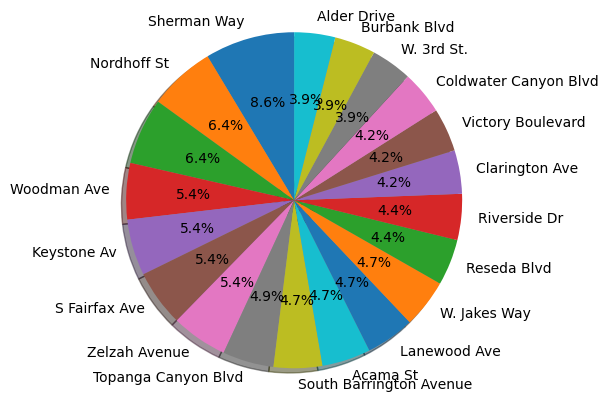

In [25]:
from matplotlib import pyplot as plt
data = df["street"].value_counts()[0:20]
fig1, ax1 = plt.subplots()
ax1.pie(data, labels = data.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


In [4]:
df_model = df[['price','city','latitude',
       'longitude','bed_rooms', 'bath_rooms','ft','is_available_now',
       'has_cats_ok', 'has_dogs_ok', 'has_wd_in_unit', 'is_furnished',
       'has_attached_garage', 'no_smoking', 'is_wheelchair_accessible',
       'has_air_conditioning', 'has_ev_charging']]

In [5]:
df_model.city.unique()

array(['Los Angeles', None, 'Santa Monica', 'Monrovia', 'Marina Del Rey',
       'Studio City', 'Hollywood Hills', 'Long Beach', 'Van Nuys',
       'Playa Vista', 'Sherman Oaks', 'West Hollywood', 'Pasadena',
       'Reseda', 'Burbank', 'Pico Rivera', 'Canyon Country', 'Hollywood',
       'Tarzana', 'Winnetka', 'Montebello', 'Glendale', 'North Hollywood',
       'Lancaster', 'reseda', 'lancaster', 'San Dimas', 'Northridge',
       'Encino', 'West Covina', 'Sunland', 'Woodland Hills', 'Arcadia',
       'Hacienda Heights', 'Agoura Hills', 'Valley Village', 'West Hills',
       'Marina del Rey', 'Culver City', 'Inglewood', 'Sherman Village',
       'Alhambra', 'Carson', '90046', '90068', 'Santa Clarita',
       'Stevenson Ranch', 'Covina', 'Mar Vista', 'Lomita', 'Hawthorne',
       'Leimert Park', 'Lake Balboa', 'Harbor City', 'West Los Angeles',
       'korea town', 'Torrance', 'Chatsworth', 'valley village',
       'Valencia', 'Panorama City', 'Pomona', 'North Hills', 'VENICE',
       '

In [7]:
df_model.head()

,price,city,latitude,longitude,bed_rooms,bath_rooms,ft,is_available_now,has_cats_ok,has_dogs_ok,has_wd_in_unit,is_furnished,has_attached_garage,no_smoking,is_wheelchair_accessible,has_air_conditioning,has_ev_charging
0,2250.0,Los Angeles,34.002397,-118.419818,1,1,700.0,True,True,False,False,False,False,False,False,False,False
1,5795.0,None,NaN,NaN,3,2,NaN,False,True,True,False,False,False,False,False,False,False
2,4406.0,Los Angeles,34.066000,-118.474000,2,2,1250.0,True,True,True,False,False,False,False,False,False,False
3,1325.0,Los Angeles,34.081810,-118.303609,0,1,NaN,True,False,False,False,False,False,False,False,False,False
4,1450.0,Los Angeles,34.009261,-118.333156,0,1,NaN,False,False,False,False,False,False,False,False,False,False


In [10]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
import pickle

# Load your data
data = df_model

# Split features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Define categorical and boolean columns
categorical_cols = ['city']
boolean_cols = ['is_available_now', 'has_cats_ok', 'has_dogs_ok', 'has_wd_in_unit', 
                 'is_furnished', 'has_attached_garage', 'no_smoking', 
                 'is_wheelchair_accessible', 'has_air_conditioning', 'has_ev_charging']

# Create pipeline for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

boolean_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_cols),
    ('bool', boolean_transformer, boolean_cols)
])

# Add XGBoost model to the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# Cross-validate the model
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("Cross-validated RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

# Fit the model to the entire dataset
model.fit(X, y)
print("Model trained and fitted successfully!")

# Save the model as a pickle file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'xgboost_model.pkl'")


Cross-validated RMSE scores: [1360.55075875  731.94170551 1668.02278976  919.49856363  669.49544811]
Mean RMSE: 1069.9018531528855
Model trained and fitted successfully!
Model saved as 'xgboost_model.pkl'


In [11]:
X.columns

Index(['city', 'latitude', 'longitude', 'bed_rooms', 'bath_rooms', 'ft',
       'is_available_now', 'has_cats_ok', 'has_dogs_ok', 'has_wd_in_unit',
       'is_furnished', 'has_attached_garage', 'no_smoking',
       'is_wheelchair_accessible', 'has_air_conditioning', 'has_ev_charging'],
      dtype='object')